In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder





In [33]:
# Load the german credit data
df = pd.read_csv("/Users/sarthakchawla/Downloads/GermanCredit.csv")

In [34]:
df

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
996,30,3857,4,4,40,1,1,0,1,Good,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,1,1,Good,...,0,0,1,0,1,0,0,0,1,0
998,45,1845,4,4,23,1,1,0,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [35]:
# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
Y = df['Class']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# PART A

In [36]:
# Define the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 11),
}

# Define the grid search object with 5-fold cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train,Y_train)

# Print the best hyperparameters and corresponding cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Cross-validation score:', grid_search.best_score_)



Best hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 20}
Cross-validation score: 0.72


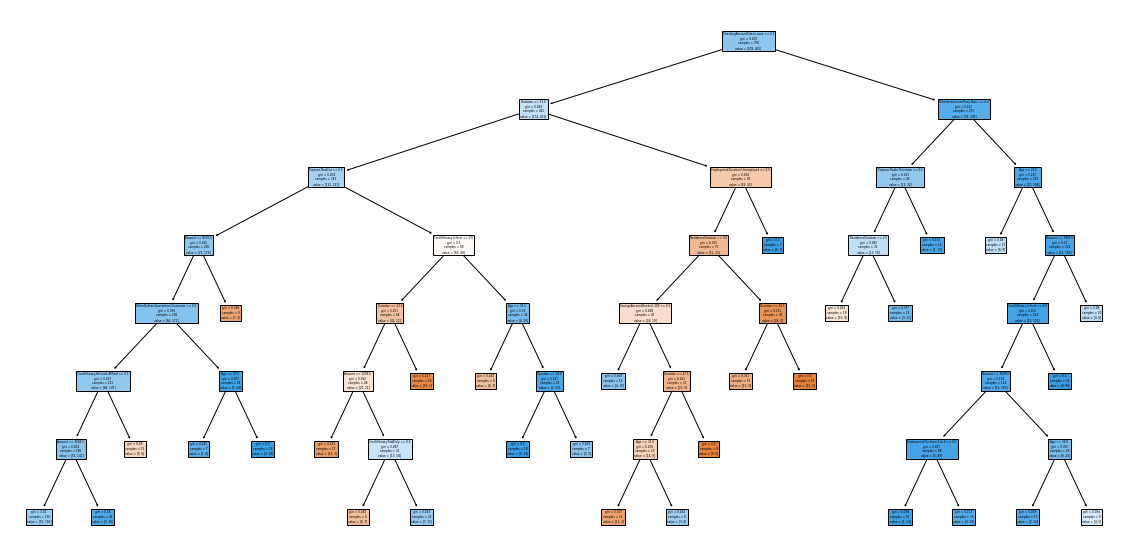

Test error rate: 0.29000000000000004


In [37]:
# Plot the pruned decision tree
best_dtc = grid_search.best_estimator_
plt.figure(figsize=(20,10))
plt.title("Pruned Decision Tree")
plot_tree(best_dtc, filled=True, feature_names=X_train.columns)
plt.show()

# Compute the test error rate of the pruned decision tree
test_accuracy = best_dtc.score(X_test, Y_test)
test_error_rate = 1 - test_accuracy
print('Test error rate:', test_error_rate)


In [38]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

# PART B

In [39]:
# Define the parameter grid for the number of features to generate the splits
param_grid2 = {'max_features': [5, 10, 15, 20]}

# Define the random forest model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Tune the number of features to create the splits using 5-fold cross-validation
grid_search2 = GridSearchCV(rf, param_grid=param_grid2, cv=5)
grid_search2.fit(X_train, Y_train)

# Generate the best model and its parameters
best_rf = grid_search2.best_estimator_
best_params = grid_search2.best_params_

print(f"Best parameters: {best_params}")

# Fit a random forest to the training data with the parameter of the number of features to create the splits tuned by 5-fold cross-validation
rf_tuned = RandomForestClassifier(n_estimators=1000, max_features=best_params['max_features'], random_state=42)
rf_tuned.fit(X_train, Y_train)

# Compute the test error rate of the random forest
Y_pred_rf = grid_search2.predict(X_test)
test_accuracy_rf = rf_tuned.score(X_test, Y_test)
test_error_rate_rf = 1 - test_accuracy_rf
print('Test error rate of random forest:', test_error_rate_rf)


Best parameters: {'max_features': 5}
Test error rate of random forest: 0.24


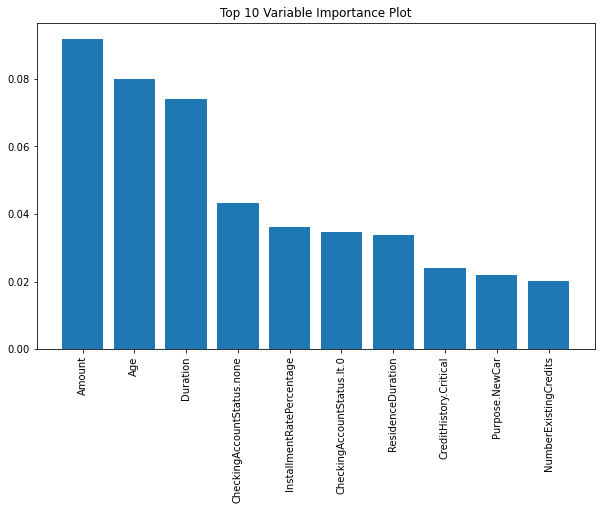

In [40]:
# Get the feature importances from the random forest model
importances = rf_tuned.feature_importances_

# Sort the feature importances in descending order(Select only top 10 most important features)
indices = np.argsort(importances)[::-1][:10]   

# Create a bar plot of the feature importances
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X_train.columns[indices], rotation=90)
plt.title("Top 10 Variable Importance Plot")
plt.show()



# PART C

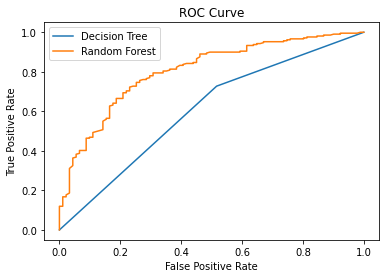

In [41]:
# Encode the labels to binary values
le = LabelEncoder()
Y_test_bin = le.fit_transform(Y_test)

# Compute the probabilities and the ROC curve for the decision tree
dtc_probs = dtc.predict_proba(X_test)[:, 1]
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(Y_test_bin, dtc_probs)

# Compute the probabilities and the ROC curve for the random forest
rf_probs = rf_tuned.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test_bin, rf_probs)

# Plot the ROC curves for the decision tree and the random forest
plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#The plot shows the ROC curves for the decision tree and the random forest models. The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) for different threshold values. A perfect classifier would have an ROC curve that passes through the top left corner of the plot, with TPR = 1 and FPR = 0.

In this plot, we can see that the random forest model has a better performance than the decision tree model, as its ROC curve is closer to the top left corner of the plot. This suggests that the random forest model has a better balance between TPR and FPR and is able to correctly classify more instances of the positive class (i.e., 'Risk = Bad') while making fewer false positive errors.

Overall, the plot provides a visual comparison of the performance of the decision tree and random forest models in terms of their ability to discriminate between the two classes in the test data.



